In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import binom, norm, beta, chisquare,chi2_contingency,ttest_ind
from statsmodels.stats.proportion import proportions_ztest,proportion_confint

In [ ]:
# Mount drive to access folder
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read in the data
bank_marketing_df = pd.read_csv('/content/drive/MyDrive/Statistics/bank-full.csv')

# Display the first 5 rows
bank_marketing_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Part I: Exploratory Data Analysis (EDA)


In [ ]:
#Information about the dataset
bank_marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- The dataset includes 45211 records and 17 columns.
- There are no nulls in the dataset.
- The dataset consists of both numeric and categorical data types.

In [ ]:
# Describe numerical features
bank_marketing_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Customers' ages range from 18 to 95, with an average of approximately 40 years(standard deviation of +/- 10). The average customer balance is 1,362 euros with a std of 3,044 euros, which suggests a widespread and skewed distribution.

The average call duration is approximately 258 seconds (approximately 4.3 minutes) per contact. The number of campaigns ranges from 1 to 63, averaging approximately 3.

For previous campaign contacts, the average number of days since the last contact is approximately 40, and the average number of "previous" contacts is 0.58.

In [ ]:
# Describe non-numerical features
bank_marketing_df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


-  There are 10 unique job categories, with blue-collar being the most common.

- There are three categories for marital status, with married customers being the majority. Most customers have a secondary education level.

- Loan Status: Most customers did not default on loans (e.g., housing and personal loans).

- There are three contact types, with cellular being the most common method.

- May is the most frequent month for campaign contact.  

- The target variable "y" indicates whether a customer subscribed to a term deposit. Most customers in the dataset did not subscribe to a term deposit.

### Strengths and limitations of the campaign strategy

- Data collection was conducted using the phone channel. There are several limitations related to campaigning using the phone. First, biases in response as the caller may feel pressure to answer in a particular way. Another limitation is that callers may feel rushed, especially if a call occurs inconveniently. In addition, repeated calls from bank representatives may annoy callers, which impacts their response. The advantage of this method is that it is time and cost efficient.

### Calculate and interpret:
- Measures of central tendency and spread.
- The relationship between quantitative variables using correlation and scatterplots



In [ ]:
# Numerical features
numerical_features = bank_marketing_df[['age', 'balance', 'day','duration', 'pdays', 'campaign', 'previous']]

# Initialize results dictionary
results = {}

# for loop for each numerical feature
for feature in numerical_features:
    # Compute measure of tendency and spread
    mean_val = bank_marketing_df[feature].mean() # mean
    median_val = bank_marketing_df[feature].median() # median
    mode_val = bank_marketing_df[feature].mode()[0]  #mode
    std_val = bank_marketing_df[feature].std() #standard deviation
    range_val = bank_marketing_df[feature].max() - bank_marketing_df[feature].min() #range
    q1 = bank_marketing_df[feature].quantile(0.25) #25th percentile
    q3 = bank_marketing_df[feature].quantile(0.75) #75th percentile
    iqr = q3 - q1 # interquartile range

    # Store results for each numeric feature
    results[feature] = {
        'Mean': mean_val,
        'Median': median_val,
        'Mode': mode_val,
        'Standard Deviation': std_val,
        'Range': range_val,
        'Q1': q1,
        'Q3': q3,
        'IQR': iqr,
    }

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)
results_df

,age,balance,day,duration,pdays,campaign,previous
Mean,40.936210,1362.272058,15.806419,258.163080,40.197828,2.763841,0.580323
Median,39.000000,448.000000,16.000000,180.000000,-1.000000,2.000000,0.000000
Mode,32.000000,0.000000,20.000000,124.000000,-1.000000,1.000000,0.000000
Standard Deviation,10.618762,3044.765829,8.322476,257.527812,100.128746,3.098021,2.303441
Range,77.000000,110146.000000,30.000000,4918.000000,872.000000,62.000000,275.000000
Q1,33.000000,72.000000,8.000000,103.000000,-1.000000,1.000000,0.000000
Q3,48.000000,1428.000000,21.000000,319.000000,-1.000000,3.000000,0.000000
IQR,15.000000,1356.000000,13.000000,216.000000,0.000000,2.000000,0.000000


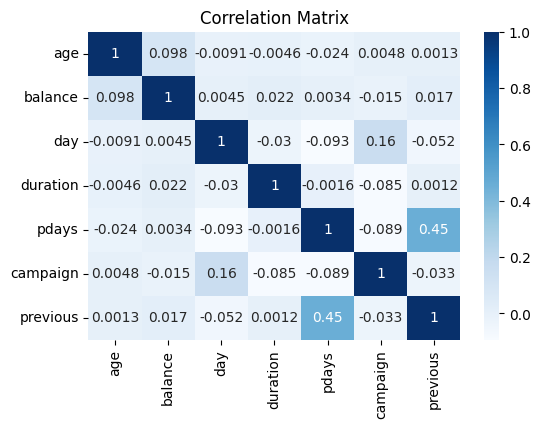

In [ ]:
# Correlation among the numerical features
corr = numerical_features.corr() # Features for the correlation matrix
plt.figure(figsize = (6,4)) # Create figure
sns.heatmap(corr, annot = True, cmap = 'Blues') # plot heatmap
plt.title('Correlation Matrix') # title
plt.show() # show plot

- There is a moderate positive relationship (0.45) between previous and pdays


- For the remaining features, there is a weak to no linear relationship between the variables.

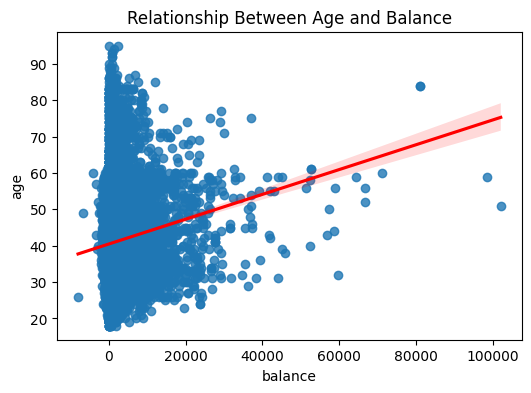

In [ ]:
# Examine the relationship between age and balance using a scatterplot
plt.figure(figsize=(6,4)) # Plot figure
# Define parameters for regplot
sns.regplot(x='balance', y='age', data=bank_marketing_df,
            line_kws={'color': 'red'})
plt.title('Relationship Between Age and Balance') # Create title
plt.show() # Show visual

The visual shows a positive relationship between age and balance, but it is a very weak relationship, suggesting that age does not influence customers' balance.

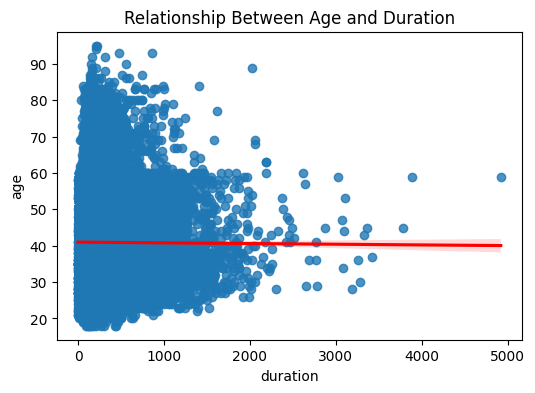

In [ ]:
# Examine the relationship Between Age and Duration using a scatterplot
plt.figure(figsize=(6,4))

# Plot the relationship of both variables with a regression line
sns.regplot(x='duration', y='age', data=bank_marketing_df,
            line_kws={'color': 'red'})
plt.title('Relationship Between Age and Duration') # title
plt.show()

The graph shows a weak negative relationship between duration and age, which suggests that as age increases, the duration of calls tends to be shorter. However, outliers exist, with some customers over 60 having calls lasting more than 4000 seconds.

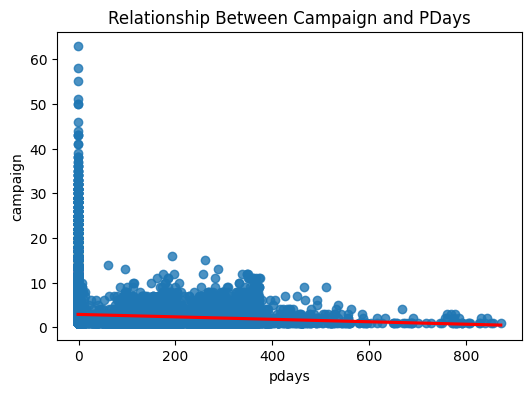

In [ ]:
# Examine the relationship between Campaign and pdays using a scatterplot
plt.figure(figsize=(6,4)) # Plot figure
# Define parameters for the regplot
sns.regplot(x='pdays', y='campaign', data=bank_marketing_df,
            line_kws={'color': 'red'})
plt.title('Relationship Between Campaign and PDays') # Title
plt.show() #display

- The graph illustrates a weak negative relationship between campaign and pdays (correlation coefficient of -0.089). This suggests that as the number of days since the last contact (pdays) increases, the number of contacts made during the current campaign decreases.



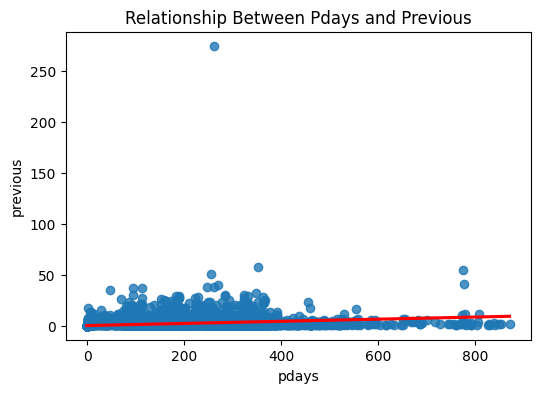

In [ ]:
# Examine the relationship between previous and pdays using a scatterplot
plt.figure(figsize=(6,4))
sns.regplot(x='pdays', y='previous', data=bank_marketing_df,
            line_kws={'color': 'red'})
plt.title('Relationship Between Pdays and Previous')
plt.show()

As illustrated, there is positive relationship between pdays and previous (r= 0.45). This suggests that customers with more days since being contacted last tend to have a higher number of previous contacts.

# Part II: Probability and Distributions


Compute:Conditional, joint, and marginal probabilities for two categorical variables (e.g., job and subscription)

In [ ]:
# Rename features to subscribed for better readability
bank_marketing_df.rename(columns={'y':'subscribed', 'pdays':'days_since_last_contact', 'previous':'num_contacts_before_campaign'}, inplace=True)

In [ ]:
# Conditional probability: Education and Subscribed

# Unique education types
education_type = bank_marketing_df['education'].unique()

# Loop through each education level to calculate conditional probabilities
for education_level in education_type:
    #  Total number of customers for the given education level
    total_education = bank_marketing_df[bank_marketing_df['education'] == education_level].shape[0]

    #  Number of customers who subscribed ('yes') within an education level
    yes_subscribed = bank_marketing_df[(bank_marketing_df['education'] == education_level) &
                                       (bank_marketing_df['subscribed'] == 'yes')].shape[0]

    # Number of customers who did not subscribe ('no') within an education level
    no_subscribed = bank_marketing_df[(bank_marketing_df['education'] == education_level) &
                                      (bank_marketing_df['subscribed'] == 'no')].shape[0]

    # Compute conditional probabilities p(subscribed | education level)
    # If total_education is zero, set probability to zero
    p_yes = yes_subscribed / total_education if total_education > 0 else 0
    p_no = no_subscribed / total_education if total_education > 0 else 0

    # Print results for each education level
    print(f"P(subscribed = 'yes' | education = '{education_level}') = {p_yes:.2f}")
    print(f"P(subscribed = 'no' | education = '{education_level}') = {p_no:.2f}")


P(subscribed = 'yes' | education = 'tertiary') = 0.15
P(subscribed = 'no' | education = 'tertiary') = 0.85
P(subscribed = 'yes' | education = 'secondary') = 0.11
P(subscribed = 'no' | education = 'secondary') = 0.89
P(subscribed = 'yes' | education = 'unknown') = 0.14
P(subscribed = 'no' | education = 'unknown') = 0.86
P(subscribed = 'yes' | education = 'primary') = 0.09
P(subscribed = 'no' | education = 'primary') = 0.91


In [ ]:
# Joint probability: Education and Subscription

# Group by education and subscription status and count occurrences
# Divide each count by the total number of records to calculate the joint probabilities
joint_probability = bank_marketing_df.groupby(['education', 'subscribed']).size() / len(bank_marketing_df)

# Round probabilities for better readability
joint_probability = joint_probability.round(3)

# Display results
print(joint_probability)

education  subscribed
primary    no            0.138
           yes           0.013
secondary  no            0.459
           yes           0.054
tertiary   no            0.250
           yes           0.044
unknown    no            0.036
           yes           0.006
dtype: float64


In [ ]:
# Marginal probability: Education

# Calculate the marginal probability of each education level by grouping data by 'education' and counting occurrences
# and  dividing the counts by the total number of records in the dataset
marginal_probability = round(bank_marketing_df.groupby('education').size() / len(bank_marketing_df),3)

# Print marginal probabilities
print(f'Marginal probability of primary education:', marginal_probability['primary'])
print(f'Marginal probability of secondary education:', marginal_probability['secondary'])
print(f'Marginal probability of tertiary education::', marginal_probability['tertiary'])
print(f'Marginal probability of unknown education:', marginal_probability['unknown'])

Marginal probability of primary education: 0.152
Marginal probability of secondary education: 0.513
Marginal probability of tertiary education:: 0.294
Marginal probability of unknown education: 0.041


Choose two appropriate variables and fit them to a known probability distribution. Justify your choice.

In [ ]:
 # Check skewness of the age feature
 bank_marketing_df['age'].skew()

np.float64(0.6848179257252598)

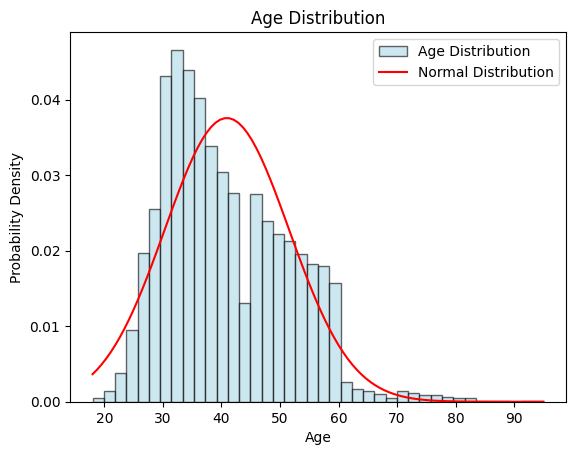

Mean: 40.94, Standard Deviation: 10.62


In [ ]:
# Fit normal distribution to age
age_analysis = bank_marketing_df['age']
mean, std_dev = norm.fit(age_analysis)

# Plot histogram and normal distribution curve
plt.hist(age_analysis, bins=40, density=True, alpha=0.6,color = 'lightblue', edgecolor='black', label='Age Distribution')
x = np.linspace(age_analysis.min(), age_analysis.max(), 100)
plt.plot(x, norm.pdf(x, mean, std_dev), 'r-', label='Normal Distribution')

# Labels and title of the graph
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.title('Age Distribution')
plt.legend()
plt.show()

# Print the mean and standard deviation
print(f"Mean: {mean:.2f}, Standard Deviation: {std_dev:.2f}")

The choice to fit age to a normal distribution was determined by the shape of the histogram and the skewness values; age is close to being normally distributed, with a skewness value of 0.68, fairly close to the perfect normal distribution value of zero, and is within the acceptable normal range of -1 and +1.

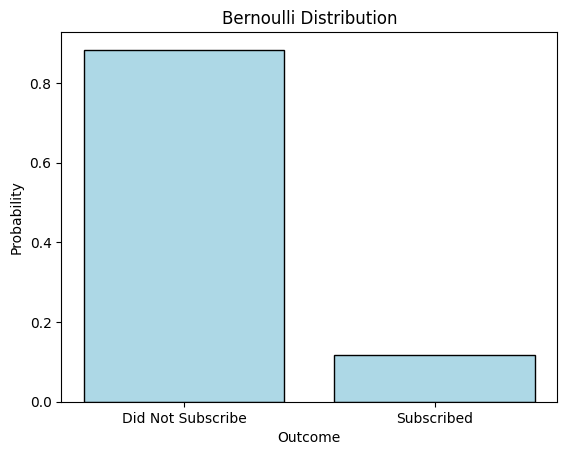

In [ ]:
# Bernoulli distribution: Subscribed

# Calculate the probability of subscription success
p = (bank_marketing_df['subscribed'] == 'yes').mean()

# Create a bar plot to visualize the Bernoulli distribution
plt.bar([0, 1], [1-p, p], color='lightblue', edgecolor='black')

# The labels for each outcome: did not subscribe (0) and subscribed (1)
plt.xticks([0, 1], ['Did Not Subscribe', 'Subscribed'])
# Label the x-axis
plt.xlabel('Outcome')
plt.ylabel('Probability') # Label the y-axis
plt.title(f'Bernoulli Distribution') # Set a title
plt.show() # Show the graph

 The choice to model "subscribed" to a Bernoulli Distribution is that it meets the conditions of this type of distribution. First, it includes a single trial with two outcomes (subscribe, did not subscribe), and the probability of success(subscribed) remains constant for each trial.


# Part III: Inference and Hypothesis Testing


Two-sample t-test:

 Null hypothesis (H0): there is no difference in the average subscription rates between admins and technicians

Alternative hypothesis (H1): there is a significant difference in the average subscription rates between the two groups.

In [ ]:
# Create a subset of the data to include only admin and technicians
subset_df = bank_marketing_df[bank_marketing_df['job'].isin(['admin.', 'technician'])].copy()

# create a new field using the subscribed field that maps yes to 1 and no to 0
subset_df.loc[:, 'subscribed_numeric'] = subset_df['subscribed'].map({'yes': 1, 'no': 0})

# Split into two groups
admin_group = subset_df[subset_df['job'] == 'admin.']['subscribed_numeric']
technician_group = subset_df[subset_df['job'] == 'technician']['subscribed_numeric']

# Perform A two-sample t-test
t_stat, p_value = stats.ttest_ind(admin_group, technician_group)
print('T-statistic:', t_stat)
print('P-value:', p_value)

# Significance level for hypothesis testing
alpha = 0.05
# Determine whether to reject or fail to reject the null hypothesis
if p_value < alpha:
    print('Reject the null hypothesis: there is a significant difference in the average subscription rates between admins and technicians.')
else:
    print('Fail to reject the null hypothesis: there is no difference in mean subscription rates between admins and technicians.')

T-statistic: 1.990562168970756
P-value: 0.04655032872886606
Reject the null hypothesis: there is a significant difference in the average subscription rates between admins and technicians.


In addition to the results stated above, the t-statistic of 1.99 suggests that the mean subscription rate for admins is higher than for technicians.

### The Goodness of Fit test evaluates if a sample distribution fits a population distribution.

Null Hypothesis (H0):  job types follow a uniform distribution

Alternative Hypothesis (H1): job types do not follow a uniform distribution.


In [ ]:
# Observed frequency of job
observed_counts = bank_marketing_df['job'].value_counts()

# expected frequencies are equal (uniform distribution)
expected_counts = [observed_counts.sum() / len(observed_counts)] * len(observed_counts)

# Chi-square goodness-of-fit test
chi_stat, chi_p_value = stats.chisquare(f_obs=observed_counts, f_exp=expected_counts)
print("Chi-square statistic:", chi_stat)
print("P-value:", chi_p_value)

# Significance level for hypothesis testing
alpha = 0.05
# Determine whether to reject or fail to reject the null hypothesis
if chi_p_value < alpha:
    print("Reject the null hypothesis: The job distribution is not uniform across types.")
else:
    print("Fail to reject the null hypothesis: The job distribution appears uniform.")

Chi-square statistic: 34389.961801331534
P-value: 0.0
Reject the null hypothesis: The job distribution is not uniform across types.


Interpretation: certain positions appear more often (e.g., admin)than others(e.g., student).

In [ ]:
# Calculate the number of subscribed customers
num_subscribed = (bank_marketing_df['subscribed'] == 'yes').sum()

# Number of rows in the data
total_rows = len(bank_marketing_df)

# Calculate the success rate
success_rate = num_subscribed / total_rows

# Set Z-score for a 95% confidence level (from standard normal distribution)
z = 1.96

# Calculate standard error of the proportion
stderr = np.sqrt(success_rate * (1 - success_rate) / total_rows)

# Calculate margin of error
margin_of_error = z * stderr

# Confidence interval bounds
lower_bound = success_rate - margin_of_error
upper_bound = success_rate + margin_of_error

# Print results
print(f"Success Rate: {success_rate:.4f}")
print(f"95% Confidence Interval: [{lower_bound:.4f}, {upper_bound:.4f}]")


Success Rate: 0.1170
95% Confidence Interval: [0.1140, 0.1199]


Interpretation:Approximately 11.7% of customers subscribe to the term deposit. A 95% confidence interval suggests that 95% of the calculated confidence intervals would contain the true subscription rate if the sampling process were repeated many times.

# Part IV: Bayesian Analysis

Estimate the probability a customer subscribes to a term deposit using Bayesian inference:
- Define a prior (can be informed or uninformed).
- Use conjugate priors to update with observed data.
- Calculate the posterior distribution and credible interval.

In [ ]:
# Observed data
num_subscribed = (bank_marketing_df['subscribed'] == 'yes').sum()
num_did_not_subscribe = (bank_marketing_df['subscribed'] == 'no').sum()
total = num_did_not_subscribe + num_subscribed

# Prior belief (ninformed priors with equally likely outcomes)
prior_alpha= 1
prior_beta = 1

# Update uninformed prior with observe data and calculate posterior
posterior_alpha = prior_alpha + num_subscribed
posterior_beta = prior_beta + num_did_not_subscribe

#Estimated probability of subscription after observing the data
estimated_prob = posterior_alpha / (posterior_alpha + posterior_beta)

# Calculate 95% credible interval
credible_interval_95 = beta.interval(0.95, posterior_alpha, posterior_beta)

# Print results with interpretations
print(f"Estimated Probability of Subscription: {estimated_prob:.3f}")
print(f"95% Credible Interval: [{credible_interval_95[0]:.3f}, {credible_interval_95[1]:.4f}]")

# Print actual observed data counts
print(f"Number of subscribers: {num_subscribed}")
print(f"Number of non-subscribers: {num_did_not_subscribe}")
print(f"Total customers: {total}")

# Print posterior distribution parameters (Beta)
print(f"Posterior parameters: Beta({posterior_alpha}, {posterior_beta})")

Estimated Probability of Subscription: 0.117
95% Credible Interval: [0.114, 0.1200]
Number of subscribers: 5289
Number of non-subscribers: 39922
Total customers: 45211
Posterior parameters: Beta(5290, 39923)


Approximately 11.7% of customers subscribe to the term deposit, with a 95% credible interval ranging from 11.4% to 12.0%. This suggests that the true subscription rate is within this range, based on observed data and prior belief.

# Part V: A/B Testing
- Simulate or subset the data to create two marketing strategies (e.g., phone call vs. email):
- Perform an A/B test.
- Determine if one method is statistically significantly better.





In [ ]:
#  Random seed for reproducibility
np.random.seed(42)

# Randomly assign half of the dataset to the email marketing group
email_channel_df = bank_marketing_df.sample(frac=0.5, random_state=42).copy()
email_channel_df['channel'] = 'email'
email_channel_df['subscribed'] = email_channel_df['subscribed'].apply(lambda x: 1 if x == 'yes' else 0)

# Assign the remaining half of the dataset to the phone call marketing group
phone_chanel_df = bank_marketing_df[~bank_marketing_df.index.isin(email_channel_df.index)].copy()
phone_chanel_df['channel'] = 'phone'
phone_chanel_df['subscribed'] = phone_chanel_df['subscribed'].apply(lambda x: 1 if x == 'yes' else 0)

# Combine the two groups into one dataset
ab_test_df = pd.concat([email_channel_df, phone_chanel_df])

# Contingency table for Chi-square test
contingency_table = pd.crosstab(ab_test_df['channel'], ab_test_df['subscribed'])

# Perform the Chi-square test
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)

# Print results
print(f"Chi-square statistic: {chi2_stat:.4f}, p-value: {p_val:.4f}")

# Determine statistical significance at the 5% level
if p_val < 0.05:
    print("Reject the null hypothesis. Subscription rates significantly differ between marketing channels.")
else:
    print("Fail to reject the null hypothesis. No significant difference in subscription rates between channels.")

Chi-square statistic: 0.2177, p-value: 0.6408
Fail to reject the null hypothesis. No significant difference in subscription rates between channels.


# Part VI: Logistic Regression


- Encode all categorical variables in your model using appropriate methods (e.g., one-hot encoding, label encoding). Clearly explain your choices.
- Fit a logistic regression model to predict whether a customer subscribes to a term deposit based on relevant features (e.g., age, job, marital status).
- Interpret coefficients, assess model fit, and evaluate prediction accuracy

In [ ]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
# Random seed for reproducibility
np.random.seed(42)

# Encode categorical variables

# Ordinal encoding for education
ordinal_encoder = OrdinalEncoder(categories=[['unknown','primary', 'secondary', 'tertiary']])
bank_marketing_df['education_encoded'] = ordinal_encoder.fit_transform(bank_marketing_df[['education']])

# Drop the original education column
bank_marketing_df = bank_marketing_df.drop('education', axis=1)

# Binary encoding for yes/no features
binary_features = ['default', 'housing', 'loan', 'subscribed']
for feature in binary_features:
    bank_marketing_df[feature] = bank_marketing_df[feature].map({'yes': 1, 'no': 0})

# Dummy encoding for the remaining features
nominal_features = ['job', 'marital', 'month', 'contact', 'poutcome']
bank_marketing_df = pd.get_dummies(bank_marketing_df, columns=nominal_features, drop_first=True)

In [ ]:
# Import library for SMOTE
from imblearn.over_sampling import SMOTE

In [ ]:
# Target variable
target_feature = 'subscribed'

# Define the features (X) and target (y)
X = bank_marketing_df.drop(target_feature, axis=1)
y = bank_marketing_df[target_feature]

# Create a SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Train/test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train model
lr_model = LogisticRegression(max_iter=6000)
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

# Evaluate
print('Performance:')
# Print the classification report
print(classification_report(y_test, y_pred))

Performance:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7908
           1       0.94      0.90      0.92      8061

    accuracy                           0.92     15969
   macro avg       0.92      0.92      0.92     15969
weighted avg       0.92      0.92      0.92     15969



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Interpretation (class 1 subscribed):
- Accuracy: out of all the predictions made, 90% of them were correct.
- Precision: of all the positive predictions made (TP/FP),94% of them were correct
- Recall: Out of all the actual subscriptions, the model correctly predicted 90% of them.
- F1 Score: the harmonic mean between recall and precision, which means the model acheived a good balance between both metrics.